# FordGoBike Data Exploration

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics

df = pd.read_csv('../input/201902-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(5)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.isna().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [5]:
# Let's drop the rows with NaN values
df.dropna(axis=0,inplace=True)
df.isna().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id           False
start_station_name         False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_name           False
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year          False
member_gender              False
bike_share_for_all_trip    False
dtype: bool

In [6]:
# descriptive statistics for numeric variables
print(df.shape)
df.describe()


(174952, 16)


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

after cleaning , from the previous cells we may say that there are 174,952 fordgobike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type. 

### What is/are the main feature(s) of interest in your dataset?

I'm most curious about figuring out what features affect the trip duration the most.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the trip duration will be affected by user_type, member_gender and age(birth date).
## Univariate Exploration

Let's Look at the distribution of the main variable of interest: duration_sec.

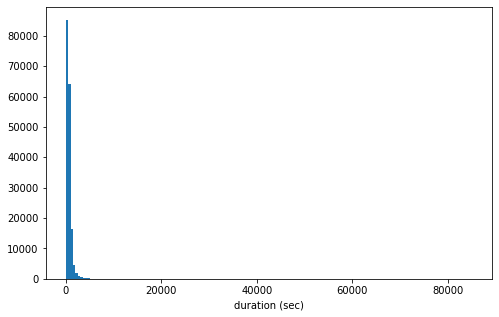

In [7]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.show()

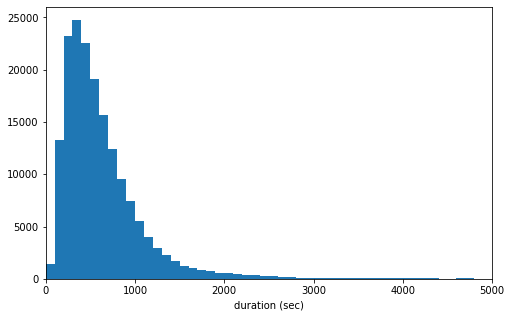

In [8]:
# Let's zoom in to the range of interest
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

x_max=5000 # roughly 

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('duration (sec)')
plt.xlim(0,x_max)
plt.show()

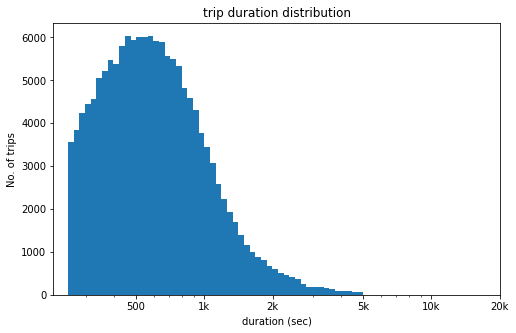

In [9]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(x_max)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('duration (sec)')
plt.ylabel("No. of trips")
plt.title("trip duration distribution")
plt.show()

it seems the distribution of the trip duration is a long-tailed one (right skewed) , and large number of trips lasted for about 300 --> 1000 sec. 
When plotted on a log-scale, the duration distribution looks unimodal, with a peak between 200 and 1000. we notice also the minimum trip duration is around 100 sec.

Next up, the first predictor variable of interest: user_type.

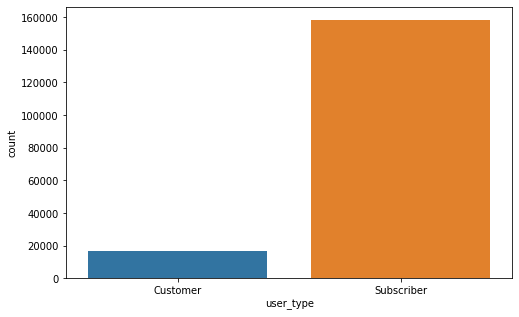

In [10]:
# the user type is categorical data so bar plot might be our best friend in this case

plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'user_type')

plt.show()

it seems most of the users are subscribers

I'll now move on to the other variables in the dataset: gender and age.

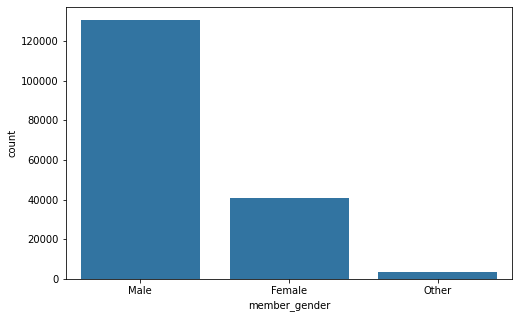

In [19]:
# let's plot the gender first.

plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'member_gender',order=["Male","Female","Other"],color=sb.color_palette()[0])

plt.show()

then from the previous two graphs we can say that most of the users are Males and subscribes 

Let's jumb to our last variable : Age

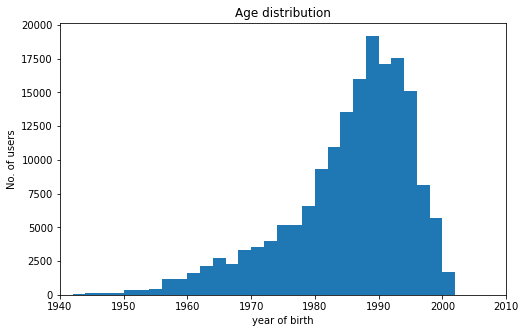

In [20]:
binsize = 2
bins = np.arange(0, df['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year',color=sb.color_palette()[0],bins=bins)
plt.xlim(1940,2010)
plt.ylabel("No. of users")
plt.title("Age distribution")
plt.xlabel("year of birth")
plt.show()

 the distribution of the members year of birth is left skewed and unimodal (centered around 1985)

-note if we calculated the age with respect to the date of collecting the data we will have to subtract the year of birth from 2019 to get the age which will make the distribution right tailed 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between 200 and 1000 sec.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the dataset i noticed some rows with no values or NaNs so i dropped those rows as they add no useful info .

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [21]:
numeric_vars = ['duration_sec', 'member_birth_year']
categoric_vars = ['user_type', 'gender']

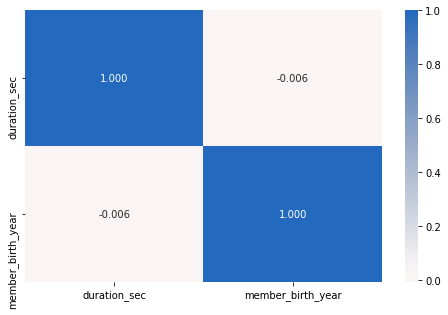

In [22]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

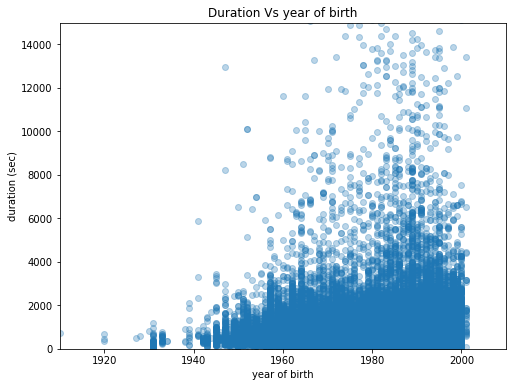

In [23]:
# scatter plot of duration_sec vs. age

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_sec', alpha = 0.3)
plt.xlim([1910, 2010])
plt.xlabel('year of birth')
plt.ylabel('duration (sec)')
plt.ylim(0,15000)

plt.title("Duration Vs year of birth")
plt.show()

i see this as an Interesting result ,
This plot suggests that most trip durations is for users whose age range from 20 to 30 which means younger users tend to have trips with higher duration  (note the graph is clipped as data may be limited) .

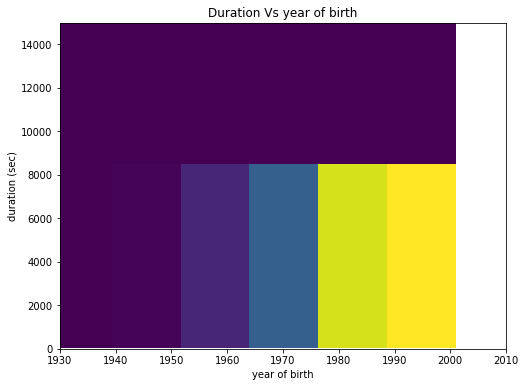

In [24]:
# Lets draw heat map to emphasize our finding.

plt.figure(figsize = [8, 6])
plt.hist2d(data = df, x = 'member_birth_year', y = 'duration_sec')
plt.xlim([1930, 2010])
plt.xlabel('year of birth')
plt.ylabel('duration (sec)')
plt.ylim(0,15000)
plt.title("Duration Vs year of birth")

plt.show()

Now, let's take a look at the relation between duration and the two categorical variables: user_type and gender .

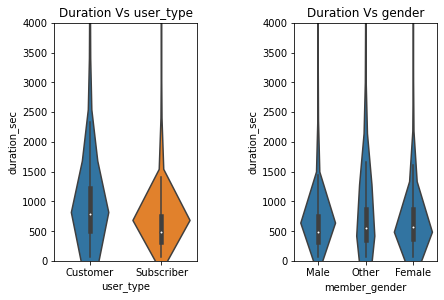

In [25]:
# plot the categorical variables against duration 



plt.subplot(1, 2, 1)
sb.violinplot(data=df,x="user_type",y="duration_sec")
plt.ylim(0,4000)

plt.title("Duration Vs user_type")


#plot 2:

plt.subplot(1, 2, 2)

sb.violinplot(data=df,x="member_gender",y="duration_sec",color=sb.color_palette()[0])
plt.ylim(0,4000)
plt.tight_layout(w_pad=5,h_pad=10,pad=0.1)

plt.title("Duration Vs gender")


plt.show()

although the number of customers are a way lower than the subscribers but they tend to have higher duration on average .
In terms of the gender relation i see no interesting results except females have higher duration trips on average than males.

note that those graphs do not give us info about the size of the samples or population used.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

the trip duration seems to have a surprisingly high amount of correlation with the age of the user. An approximately linear relationship was observed when duration was plotted against age 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

in my opinion the station id may give us some promising results in terms of the relation with trip duration as crowded places
may cause the trip duration to be longer.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the two categorical variables affect the relationship between duration and age.

In [26]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    
    plt.hist2d(x, y, cmap = palette, cmin = 0.5)


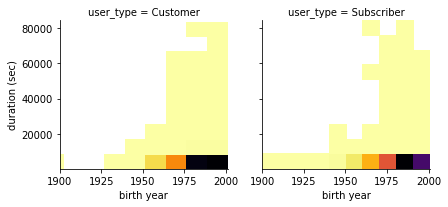

In [27]:
# create faceted heat maps on user_type variable
g = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 3, height= 3)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color = 'inferno_r')
g.set_xlabels('birth year')
g.set_ylabels('duration (sec)')

plt.show()

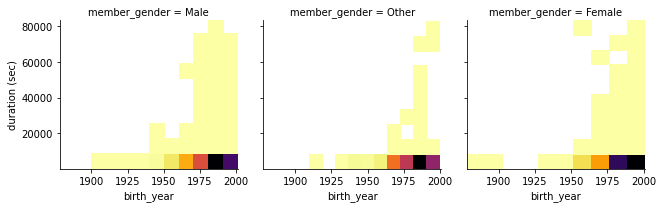

In [28]:
# create faceted heat maps on member_gender variable
g = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 4, height = 3)
g.map(hist2dgrid, 'member_birth_year', 'duration_sec', color = 'inferno_r')
g.set_xlabels('birth_year')
g.set_ylabels('duration (sec)')

plt.show()

In the previous figures we can see that whatever the type of the user or the gender the trip duration has a high correlation coeffecient with the age. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

as I studied the relation between the trip duration and each of the age ,type and gender of the users , i found that the trip duration was highly affected by the age of the user (which makes sense) younger users tend to have longer trips on bike .However, i could not find a direct relation between the trip duration and the gender or the type of the user.

further studies are recommended for the relation between the duration and the station locations.


### Were there any interesting or surprising interactions between features?

Looking back on the heat maps, it doesn't seem like there's a systematic interaction effect between the features. However, we need to consider that there is a huge difference between the number of subscribers and customers which may not be obvious from the heat map ,same goes for the gender.